In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file1 = "data/mouse_drug_data.csv"
file2 = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(file1)
clinical_df = pd.read_csv(file2)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Experiment - ask tutor

In [2]:
df1 = merge_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]


df1 = df1.groupby(["Drug", "Timepoint"])
df1.head()

df1 = pd.DataFrame(df1)
df1.head()
#df1.groups

,0,1
0,"(Capomulin, 0)",Drug Timepoint Tumor Volume (mm3) ...
1,"(Capomulin, 5)",Drug Timepoint Tumor Volume (mm3) ...
2,"(Capomulin, 10)",Drug Timepoint Tumor Volume (mm3) ...
3,"(Capomulin, 15)",Drug Timepoint Tumor Volume (mm3) ...
4,"(Capomulin, 20)",Drug Timepoint Tumor Volume (mm3) ...


## Tumor Response to Treatment  - Means (done)

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_data = merge_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
#drug_group_tumor = merge_df[["Mouse ID", "Drug", "Timepoint", "Tumor Volume (mm3)"]]

tumor_mean = tumor_data.groupby(["Drug", "Timepoint"]).mean()
#group_tumor_mean = tumor_data.groupby(["Drug", "Timepoint"]).mean().reset_index()

#Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = merge_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# # Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)

# Preview DataFrame
tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

## Tumor Response to treatment - format SEM

In [5]:
# Minor Data Munging to Re-Format the Data Frames for SEM
tumor_sem_df = tumor_sem_df.reset_index()

#pivot the table.  Got this code from Shayzee
#more information on pandas pivot at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
tumor_sem_df=tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_sem_df.head()

#----------------------- 
#tumor_mean_df.head()
# Minor Data Munging to Re-Format the Data Frames for Tumor size
#tumor_mean_df = tumor_mean_df.reset_index()
#tumor_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


## Tumor Response to treatment - format Tumor size

In [6]:
# Minor Data Munging to Re-Format the Data Frames for Tumor size
tumor_mean_df = tumor_mean_df.reset_index()
tumor_mean_df=tumor_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


## Plot Tumor Response

In [7]:
tumor_mean_df.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

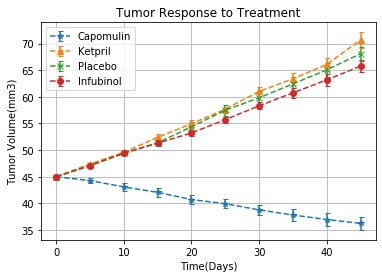

In [8]:
#turmor response to treatment

# Generate the Plot (with Error Bars)
# Format code from Shayzee

x_axis = tumor_mean_df.index
plt.errorbar(x_axis, tumor_mean_df["Capomulin"], yerr = tumor_sem_df["Capomulin"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(x_axis, tumor_mean_df["Ketapril"], yerr = tumor_sem_df["Ketapril"], fmt = '^--', capsize = 2.5, label = "Ketpril")
plt.errorbar(x_axis, tumor_mean_df["Placebo"], yerr = tumor_sem_df["Placebo"], fmt = 'x--', capsize = 2.5, label = "Placebo")
plt.errorbar(x_axis, tumor_mean_df["Infubinol"], yerr = tumor_sem_df["Infubinol"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

#legend
plt.legend(loc="best")

#gridlines
plt.grid(alpha=1)

#labels
plt.title("Tumor Response to Treatment") 
plt.xlabel("Time(Days)") 
plt.ylabel("Tumor Volume(mm3)")

#x and y limits
#plt.xlim(0,50)
#plt.ylim(34,75)

# Save and show the Figure
plt.savefig("Tumor_Response.png")
plt.show()

## Metastatic Response to Treatment - Means (Done)

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mest_data = merge_df[["Drug", "Timepoint", "Metastatic Sites"]]
mest_mean = mest_data.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
mest_mean_df = pd.DataFrame(mest_mean)

# Preview DataFrame
mest_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

## Metastatic Response to Treatment - SEM (Done)

In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mest_sem = merge_df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
mest_sem_pd = pd.DataFrame(mest_sem)

# Preview DataFrame
mest_sem_pd

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
# Generate the Plot (with Error Bars)




#legend
plt.legend(loc="best")

#gridlines
plt.grid(alpha=1)

#labels
plt.title("Tumor Response to Treatment") 
plt.xlabel("Time(Days)") 
plt.ylabel("Tumor Volume(mm3)")

#x and y limits
plt.xlim(0,50)
plt.ylim(34,75)


# Save the Figure
plt.savefig("Tumor_Response.png")



# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#Scatterplot Capomulin

df_Campomulin = merge_df[["Timepoint", "Drug", "Tumor Volume (mm3)"]]
df_Campomulin = df_Campomulin.loc[df_Campomulin["Drug"] == "Capomulin", :]




plt.scatter(df_Campomulin["Timepoint"], df_Campomulin["Tumor Volume (mm3)"], 
            marker="o", facecolors="red", edgecolors="black", alpha=0.75)

x_lim = merge_df["Timepoint"].max()
#y_lim = merge_df["Tumor Volume (mm3)"].max()
plt.xlim(-1, x_lim +5)
#plt.ylim(0, y_lim)


plt.title("Campomulin - Tumor volume change over time") 
plt.xlabel("Number of days") 
plt.ylabel("Tumor volume (mm3)")
plt.savefig("Campomulin_Scatter_Tumor_Volume.png")
plt.show


In [ ]:
#Scatterplot Infubinol

df_Infubinol = merge_df[["Timepoint", "Drug", "Tumor Volume (mm3)"]]
df_Campomulin = df_Campomulin.loc[df_Campomulin["Drug"] == "Capomulin", :]




plt.scatter(df_Campomulin["Timepoint"], df_Campomulin["Tumor Volume (mm3)"], 
            marker="o", facecolors="red", edgecolors="black", alpha=0.75)

x_lim = merge_df["Timepoint"].max()
#y_lim = merge_df["Tumor Volume (mm3)"].max()
plt.xlim(-1, x_lim +5)
#plt.ylim(0, y_lim)


plt.title("Campomulin - Tumor volume change over time") 
plt.xlabel("Number of days") 
plt.ylabel("Tumor volume (mm3)")
plt.savefig("Campomulin_Scatter_Tumor_Volume.png")
plt.show


In [ ]:
from scipy import stats
a = np.arange(20).reshape(5,4)
a
#stats.sem(a)
